In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### Prepare a classification model using SVM for salary data 

In [3]:
df_test = pd.read_csv("C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Support Vector Machines\\SalaryData_Test(1).csv")
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
df_train = pd.read_csv("C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Support Vector Machines\\SalaryData_Train(1).csv")
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA and Visualization

### Training Data

In [5]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
df_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df_train = df_train.drop(columns=['workclass','education','relationship','native','maritalstatus','sex','race'],axis = 1)

### Testing Data

In [9]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
df_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
df_test = df_test.drop(columns=['workclass','education','relationship','native','maritalstatus','sex','race'],axis = 1)

## Encoding the y variable

### Training Data

In [13]:
le = LabelEncoder()

In [14]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,0,24,0,39,0
1,33,12,3,0,0,12,0
2,21,8,5,0,0,39,0
3,36,6,5,0,0,39,0
4,11,12,9,0,0,39,0


### Testing Data

In [15]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,6,0,0,39,0
1,21,8,4,0,0,49,0
2,11,11,10,0,0,39,1
3,27,9,6,87,0,39,1
4,17,5,7,0,0,29,0


## Correlation matrix

### Training Data

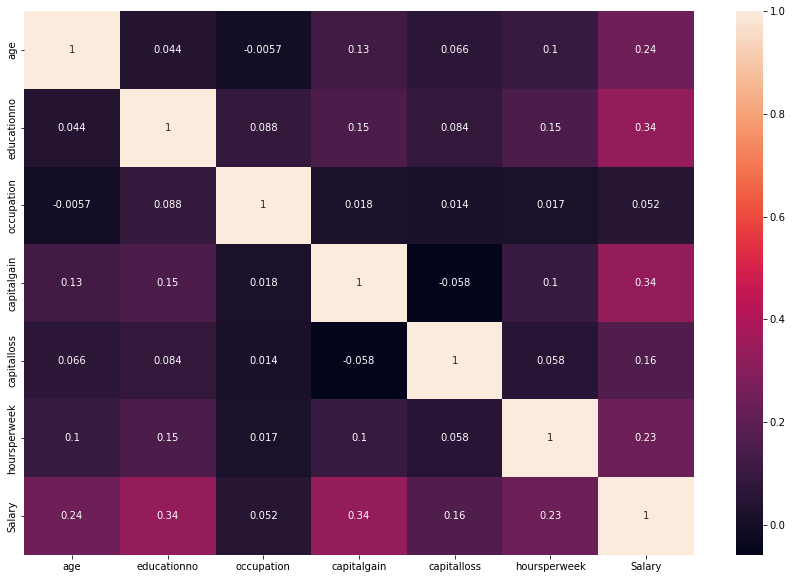

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

### Testing Data

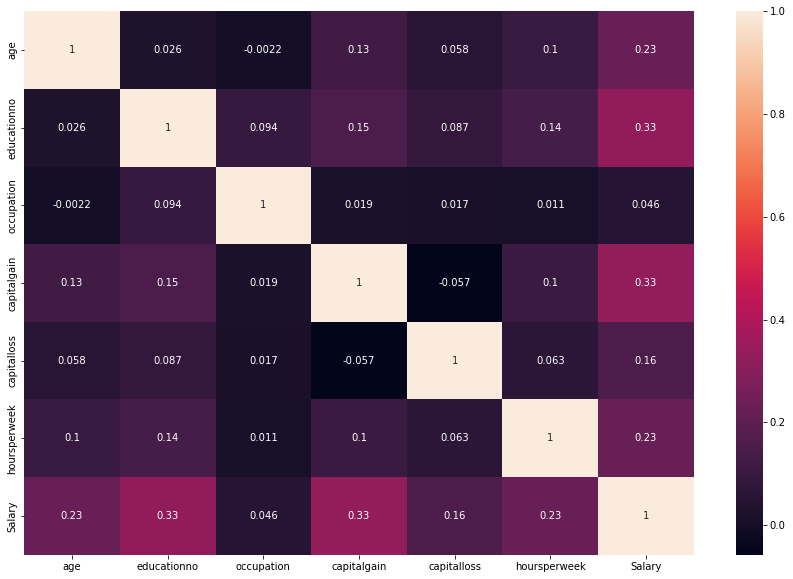

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df_test.corr(),annot = True)
plt.show()

## Training and Testing Data

In [18]:
xtrain = df_train.iloc[:, :-1]
ytrain = df_train['Salary']

In [19]:
xtest = df_test.iloc[:, :-1]
ytest = df_test['Salary']

## Model Building

In [20]:
svc = SVC()

In [21]:
svc.fit(xtrain, ytrain)

ypred = svc.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     11360
           1       0.88      0.25      0.39      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.62      0.64     15060
weighted avg       0.82      0.81      0.76     15060



In [23]:
print('Training accuracy is:', svc.score(xtrain, ytrain))
print('Testing accuracy is:', svc.score(xtest, ytest) )

Training accuracy is: 0.8080302377242133
Testing accuracy is: 0.8069057104913678


## Hyperparameter Tuning

Finding out the optimal value for gamma, c and kernel

In [24]:
params = {
    'C' : [0.1, 0.05, 0.02, 0.01, 0.2,0.75],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : [0.1,0.075,0.09, 0.08, 0.05,0.2]
}

In [25]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=0)

In [ ]:
grid.fit(xtrain, ytrain)

In [ ]:
grid.best_params_

## Updated Model
Model with best parameters

In [ ]:
svc = SVC(C =0.05, gamma = 0.1, kernel='linear')

In [ ]:
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)

In [ ]:
print('Training Accuracy is: ', svc.score(xtrain, ytrain))
print('Testing Accuracy is: ', svc.score(xtest, ytest))

In [ ]:
predicted = pd.DataFrame({'Actual' : ytest, 'Predicted' : ypred})
predicted

#### Conclusion
The accuracy has been increased for the linear model with updated parameters.

## End